In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dframe = pd.read_csv("online_retail_II.csv")
dframe

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [3]:
dframe['Year'] = pd.DatetimeIndex(dframe['InvoiceDate']).year
#dframe['Year']

In [4]:
dframe['InvoiceDate'] = pd.to_datetime(dframe['InvoiceDate'])

In [5]:
print(dframe.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Year  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009  


In [6]:
sales = dframe[(dframe['Quantity'] > 0) & (~dframe['Invoice'].str.contains('C'))]

In [7]:
print(sales.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Year  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009  


In [8]:
dframe[(dframe['Invoice'].str.contains('C') == True)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


In [9]:
dframe['Revenue'] = dframe['Quantity'] * dframe['Price']

In [10]:
revenue_per_year = dframe.groupby(dframe['InvoiceDate'].dt.year)['Revenue'].mean()

In [11]:
print(revenue_per_year.head())

InvoiceDate
2009    17.684777
2010    18.152555
2011    18.018195
Name: Revenue, dtype: float64


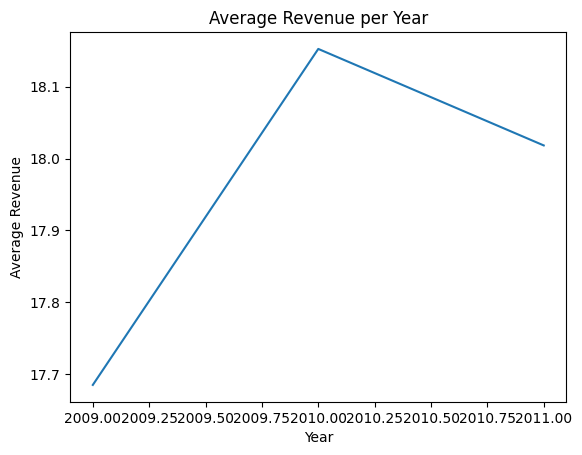

In [12]:
plt.plot(revenue_per_year.index, revenue_per_year.values)
plt.title('Average Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.show()

In [13]:
sales = dframe[(dframe['Quantity'] > 0) & (~dframe['Invoice'].str.contains('C'))]

In [14]:
finished = sales[sales['CustomerID'].notna()]

KeyError: 'CustomerID'

In [15]:
print(finished.head())

NameError: name 'finished' is not defined

In [16]:
sales = dframe[(dframe['Quantity'] > 0) & (~dframe['Invoice'].str.contains('C'))]

In [17]:
finished = sales[sales['Customer ID'].notna()]

In [18]:
print(finished.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Year  Revenue  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009     83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009     81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009     81.0  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009    100.8  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009     30.0  


In [19]:
cancel = dframe[dframe['Invoice'].str.contains('C')]

In [20]:
print(cancel.head())

     Invoice StockCode                    Description  Quantity  \
178  C489449     22087       PAPER BUNTING WHITE LACE       -12   
179  C489449    85206A   CREAM FELT EASTER EGG BASKET        -6   
180  C489449     21895  POTTING SHED SOW 'N' GROW SET        -4   
181  C489449     21896             POTTING SHED TWINE        -6   
182  C489449     22083     PAPER CHAIN KIT RETRO SPOT       -12   

            InvoiceDate  Price  Customer ID    Country  Year  Revenue  
178 2009-12-01 10:33:00   2.95      16321.0  Australia  2009    -35.4  
179 2009-12-01 10:33:00   1.65      16321.0  Australia  2009     -9.9  
180 2009-12-01 10:33:00   4.25      16321.0  Australia  2009    -17.0  
181 2009-12-01 10:33:00   2.10      16321.0  Australia  2009    -12.6  
182 2009-12-01 10:33:00   2.95      16321.0  Australia  2009    -35.4  


In [21]:
finished_per_year = finished.groupby(finished['InvoiceDate'].dt.year)['Quantity'].sum()
cancel_per_year = cancel.groupby(cancel['InvoiceDate'].dt.year)['Quantity'].sum()

In [22]:
result = pd.concat([finished_per_year, cancel_per_year], axis=1)
result.columns = ['finished', 'cancel']

In [23]:
print(result.head())

             finished  cancel
InvoiceDate                  
2009           400201  -10018
2010          5451303 -219442
2011          4869417 -261532


In [24]:
print(result.columns.head())

AttributeError: 'Index' object has no attribute 'head'

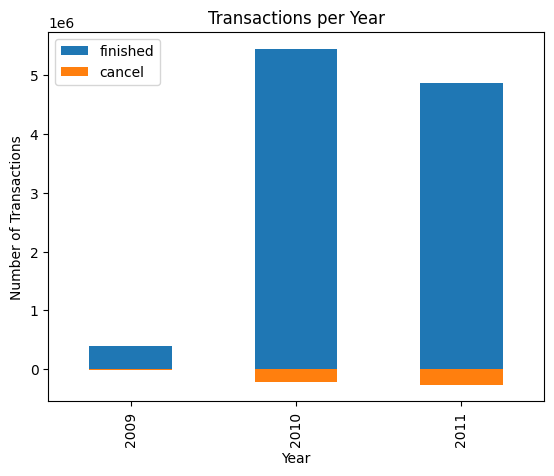

In [25]:
result.plot(kind='bar', stacked=True)
plt.title('Transactions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.show()

In [26]:
cancellation_rate_per_year = cancel_per_year / total_customer_per_year * 100

NameError: name 'total_customer_per_year' is not defined

In [27]:
cancel_per_year = cancel.groupby(cancel['InvoiceDate'].dt.year)['CustomerID'].nunique()
total_customer_per_year = (finished.groupby(finished['InvoiceDate'].dt.year)['CustomerID']
                           .nunique() + cancel_per_year)

KeyError: 'Column not found: CustomerID'

In [28]:
cancel_per_year = cancel.groupby(cancel['InvoiceDate'].dt.year)['Customer ID'].nunique()
total_customer_per_year = (finished.groupby(finished['InvoiceDate'].dt.year)['Customer ID']
                           .nunique() + cancel_per_year)

In [29]:
cancellation_rate_per_year = cancel_per_year / total_customer_per_year * 100

In [30]:
print(cancellation_rate_per_year)

InvoiceDate
2009    24.446203
2010    29.012242
2011    26.146307
Name: Customer ID, dtype: float64
